# Analysis of the Scraped Medium Articles

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data = pd.read_csv('medium.csv')

In [136]:
data.head(3)

,Unnamed: 0,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
0,0,Artificial Intelligence,WiseWolf Fund,GAME-CHANGING TRENDS TO LOOK OUT FOR WITH AI,Artificial Intelligence is a state-of-the-art ...,12.9K,Apr 30,10 responses,https://medium.com/@wisewolf_fund/unique-trend...
1,1,Artificial Intelligence,Justin Lee,Chatbots were the next big thing: what happened?,"Oh, how the headlines blared:“…the 2016 bot",7.7K,Jun 5,41 responses,https://medium.com/swlh/chatbots-were-the-next...
2,2,Artificial Intelligence,Emmanuel Ameisen,Reinforcement Learning from scratch,Inspired by a great tutorial at O’Reilly AI,907,Jun 7,1 response,https://blog.insightdatascience.com/reinforcem...


In [4]:
tag = data.groupby('1.Tag').size()
top = list(tag.index)
value = list(tag.values)
colors = ['gold', 'lightcoral', 'lightskyblue']

### Distribution of Tags (ML, DL & AI)

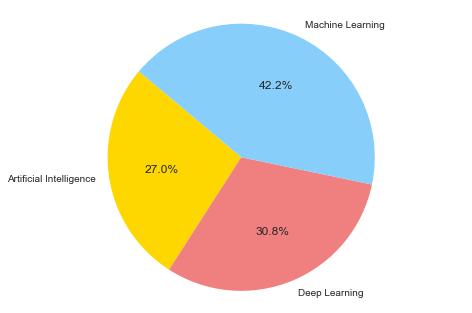

In [5]:
plt.pie(value, labels=top, colors=colors, autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()

## Most of the articles are tagged under ML followed by DL and AI

In [6]:
len(data)

185

In [5]:
len(data['3.Title'].unique())

120

### Out of 185 titles, there are 120 unique titles...so the tags have about 65 common titles

In [8]:
len(data['2.Name'].unique())

96

### There are about 96 unique authors writing in the field of AI, ML and DL 

In [6]:
name = data.groupby('2.Name').size()
name = name[(name.values>2)]

### Plotting with respect to the number of articles written by authors

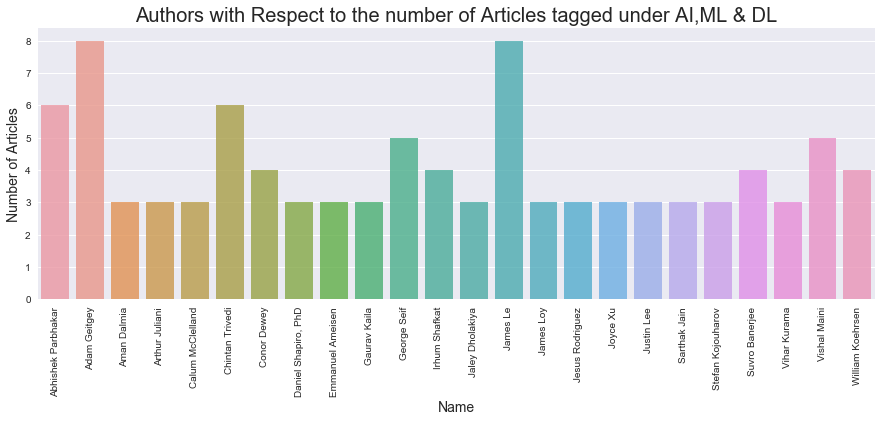

In [7]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(name.index, name.values, alpha=0.8)
plt.xlabel('Name', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.title("Authors with Respect to the number of Articles tagged under AI,ML & DL", fontsize=20)
plt.show()

### Adam Geitgey and James Lee have published the most of number of articles(8) under ML,AI & DL tag

In [49]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [57]:
text = ""
for ind, row in data.iterrows():
    text += row["3.Title"] + " "
text = text.strip()

# Wordcloud of Article Titles

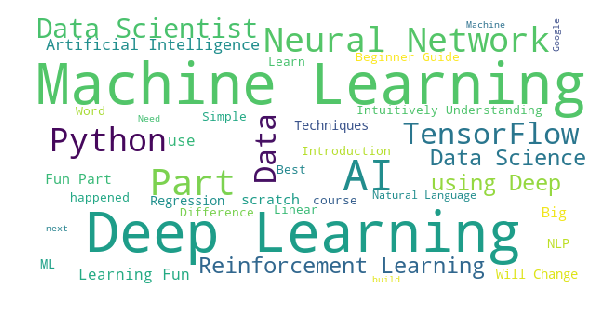

In [68]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [86]:
for i in range(0,len(data)):
    data["4.Body"][i] = str(data["4.Body"][i])
text = ""
for ind, row in data.iterrows():
    text += row["4.Body"] + " "
text = text.strip()

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Wordcloud of article subject

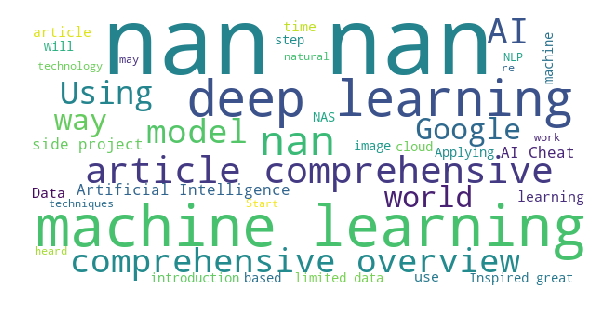

In [90]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Most of the articles don't have subject (Body) and hence NAN is in the wordcloud

In [179]:
for i in range(0,len(data)):
    if 'K' in data["5.Upvotes"][i]:
        data["5.Upvotes"][i]= int(float(data["5.Upvotes"][i].replace("K",""))*1000)
    else:
        data["5.Upvotes"][i] = int(data["5.Upvotes"][i])

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Converted 12.9K upvotes into it's corresponding integer

In [38]:
data.head(2)

,Unnamed: 0,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
0,0,Artificial Intelligence,WiseWolf Fund,GAME-CHANGING TRENDS TO LOOK OUT FOR WITH AI,Artificial Intelligence is a state-of-the-art ...,12900,Apr 30,10 responses,https://medium.com/@wisewolf_fund/unique-trend...
1,1,Artificial Intelligence,Justin Lee,Chatbots were the next big thing: what happened?,"Oh, how the headlines blared:“…the 2016 bot",7700,Jun 5,41 responses,https://medium.com/swlh/chatbots-were-the-next...


In [39]:
data['5.Upvotes'].mean()

3966.9081081081081

## On Average an article tagged under AI/DL/ML gets about 4000 upvotes 

In [201]:
data = data.drop("Unnamed: 0",axis=1)

In [41]:
upvote=data.groupby("2.Name").sum()

In [42]:
upvote.head(2)

,1.Tag,3.Title,5.Upvotes,6.Date,8.Link
2.Name,,,,,
Abhishek Parbhakar,Artificial IntelligenceArtificial Intelligence...,Must know Information Theory concepts in Deep ...,7229,Jun 3May 27Jun 3May 27Jun 3May 27,https://towardsdatascience.com/must-know-infor...
Adam Geitgey,Artificial IntelligenceArtificial Intelligence...,The Real Scandal of AI: Awful Stock PhotosMach...,118200,"May 31Jul 24, 2016Jan 3, 2016May 5, 2014Jul 24...",https://medium.com/@ageitgey/the-real-scandal-...


In [43]:
len(upvote.index)

96

In [44]:
upvote=(upvote[(upvote['5.Upvotes'] > 7000)])

### Trying out a different color pallete

In [56]:
colorr =           ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ]

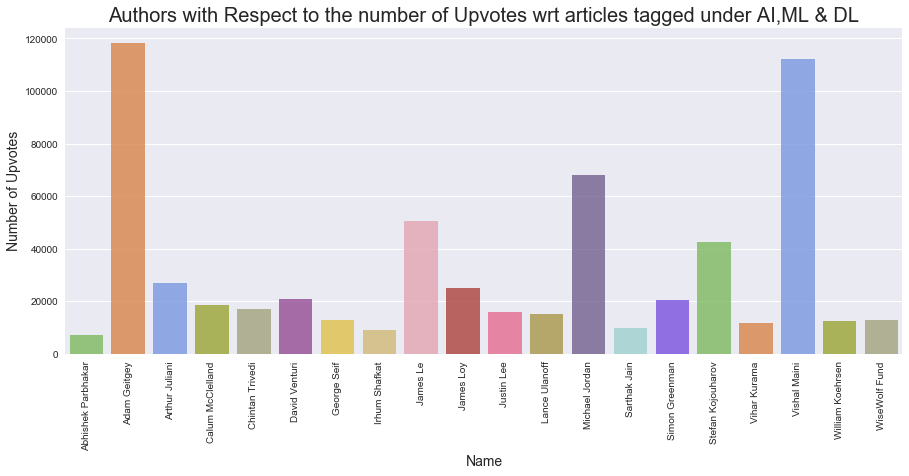

In [57]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(upvote.index, upvote["5.Upvotes"], alpha=0.8,palette=colorr)
plt.xlabel('Name', fontsize=14)
plt.ylabel('Number of Upvotes', fontsize=14)
plt.title("Authors with Respect to the number of Upvotes wrt articles tagged under AI,ML & DL", fontsize=20)
plt.show()

## Adam Geitgey has the most number of upvotes for his posts followed by Vishal Maini

## It is interesting that james lee has the same number of articles as adam geitgey, his upvotes are far less....This correlation can be used to determine the quality of articles

## Vishal Maini has more number of upvotes with comparitively less number of posts, showing us that he is a quality author in the field of AI,Ml and DL

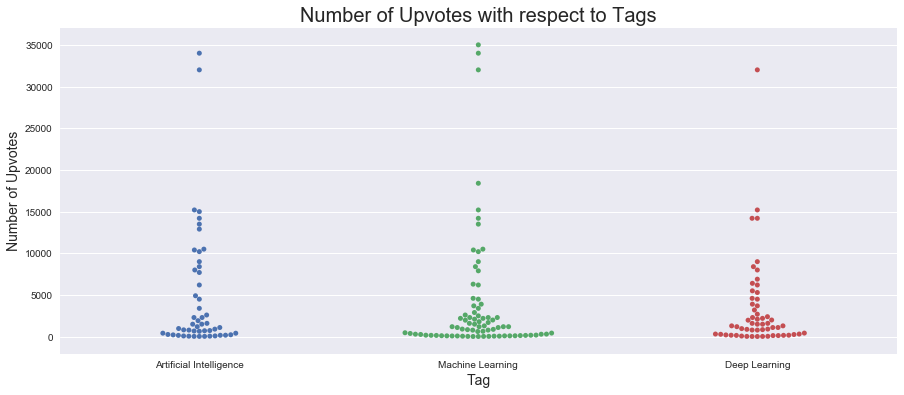

In [55]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='1.Tag', y='5.Upvotes', data=data)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Number of Upvotes', fontsize=14)
plt.title("Number of Upvotes with respect to Tags", fontsize=20)
plt.show()

## ML has more Upvotes as it has more tagged articles (42% of the articles)

### Articles tagged as ML

In [59]:
ML = data[(data['1.Tag']=='Machine Learning')]
ML.head(1)

,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
50,Machine Learning,Justin Lee,Chatbots were the next big thing: what happened?,"Oh, how the headlines blared:“…the 2016 bot",7900,Jun 5,42 responses,https://medium.com/swlh/chatbots-were-the-next...


### Articles tagged as AI

In [74]:
AI = data[(data['1.Tag']=='Artificial Intelligence')]
AI.head(1)

,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
0,Artificial Intelligence,WiseWolf Fund,GAME-CHANGING TRENDS TO LOOK OUT FOR WITH AI,Artificial Intelligence is a state-of-the-art ...,12900,Apr 30,10 responses,https://medium.com/@wisewolf_fund/unique-trend...


### Articles tagged as DL

In [61]:
DL = data[(data['1.Tag']=='Deep Learning')]
DL.head(1)

,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
128,Deep Learning,Emmanuel Ameisen,Reinforcement Learning from scratch,Inspired by a great tutorial at O’Reilly AI,912,Jun 7,2 responses,https://blog.insightdatascience.com/reinforcem...


## Intersecting posts between tags (Medium articles with multiple tags)

In [64]:
from functools import reduce
ML_DL = list(reduce(set.intersection, map(set, [ML['3.Title'], DL['3.Title']])))
ML_AI = list(reduce(set.intersection, map(set, [ML['3.Title'], AI['3.Title']])))
AI_DL = list(reduce(set.intersection, map(set, [AI['3.Title'], DL['3.Title']])))

In [70]:
tag = [len(ML_DL),len(ML_AI),len(AI_DL)]
top = ['ML and DL','ML and AI','AI and DL']
colors = ['gold', 'lightcoral', 'lightskyblue']

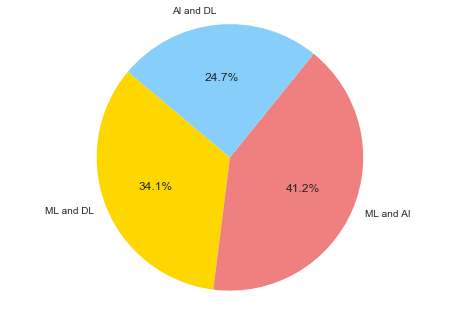

In [71]:
plt.pie(tag, labels=top, colors=colors, autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()

## 41.2% of the posts have both ML & AI tags whereas 34% of posts have ML & DL tags

In [73]:
ML_DL_AI = list(reduce(set.intersection, map(set, [ML['3.Title'], DL['3.Title'],AI['3.Title']])))
len(ML_DL_AI)

20

## 20 posts have all the 3 tags (AI, ML and DL)

In [84]:
data.head(3)

,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
0,Artificial Intelligence,WiseWolf Fund,GAME-CHANGING TRENDS TO LOOK OUT FOR WITH AI,Artificial Intelligence is a state-of-the-art ...,12900,Apr 30,10,https://medium.com/@wisewolf_fund/unique-trend...
1,Artificial Intelligence,Justin Lee,Chatbots were the next big thing: what happened?,"Oh, how the headlines blared:“…the 2016 bot",7700,Jun 5,41 responses,https://medium.com/swlh/chatbots-were-the-next...
2,Artificial Intelligence,Emmanuel Ameisen,Reinforcement Learning from scratch,Inspired by a great tutorial at O’Reilly AI,907,Jun 7,1 response,https://blog.insightdatascience.com/reinforcem...


# Converting number of responses into integers

In [174]:
for i in range(0,len(data)):
    if (pd.isnull(data['7.Comments'][i])) is True:  #enter null comments as 0
        data['7.Comments'][i] = 0    
    else:    
        data['7.Comments'][i] = str(data['7.Comments'][i])
        data['7.Comments'][i]= data['7.Comments'][i].replace(' responses','')
        data['7.Comments'][i]= data['7.Comments'][i].replace(' response','')
        data['7.Comments'][i]= int(data['7.Comments'][i])

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithC

In [192]:
data.head(1)

,Unnamed: 0,1.Tag,2.Name,3.Title,4.Body,5.Upvotes,6.Date,7.Comments,8.Link
0,0,Artificial Intelligence,WiseWolf Fund,GAME-CHANGING TRENDS TO LOOK OUT FOR WITH AI,Artificial Intelligence is a state-of-the-art ...,12900,Apr 30,10,https://medium.com/@wisewolf_fund/unique-trend...


In [183]:
np.mean(data['7.Comments'])

16.037837837837838

## Articles under AI,ML,DL tags have about 16 responses on average

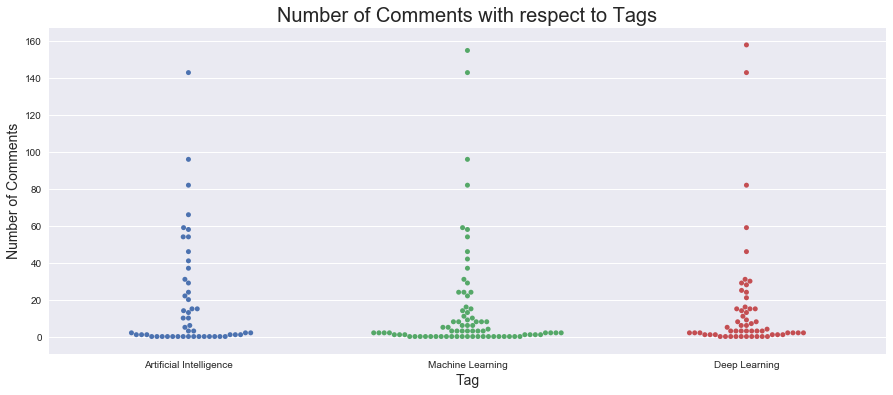

In [189]:
plt.figure(figsize=(15,6))
sns.swarmplot(x='1.Tag', y='7.Comments', data=data)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.title("Number of Comments with respect to Tags", fontsize=20)
plt.show()

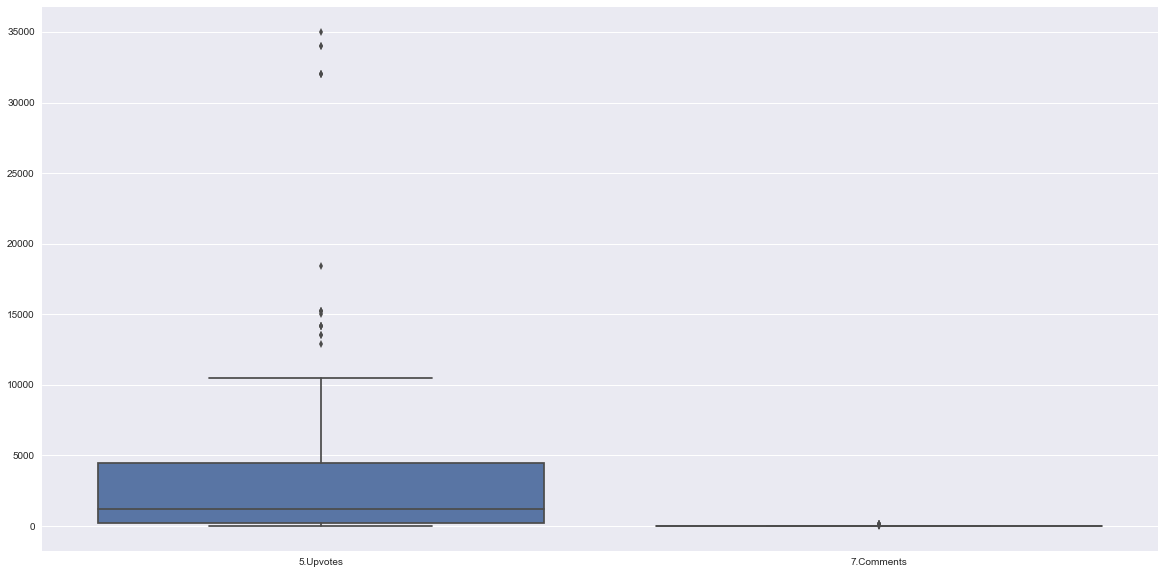

In [250]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

In [212]:
comments=data.groupby("2.Name").sum()
comments=(comments[(comments['7.Comments'] > 19)])

In [213]:
len(comments)

25

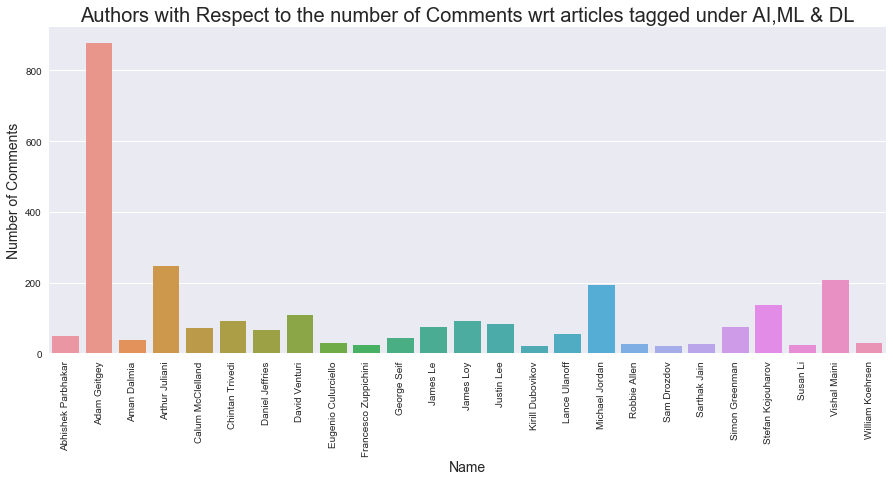

In [214]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(comments.index, comments["7.Comments"], alpha=1)
plt.xlabel('Name', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.title("Authors with Respect to the number of Comments wrt articles tagged under AI,ML & DL", fontsize=20)
plt.show()

## Again Adam leads with the most number of comments suprisingly followed by Arthur

In [230]:
for i in range(0,len(data)):
    data['6.Date'][i] =''.join([i for i in data['6.Date'][i] if not i.isdigit()])

## Analysis with respect to the month

In [236]:
month = data.groupby('6.Date').size()

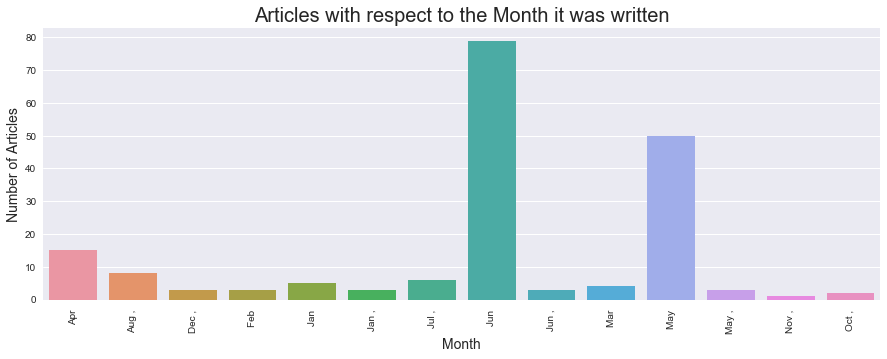

In [251]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(month.index, month.values)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.title("Articles with respect to the Month it was written", fontsize=20)
plt.show()

## Most Number of articles are written in June followed by May

# This may be due to summer vacations in these months